# EDA - 3

<br>

## Sentiment Scoring Feature Creation
### *INCLUDES refinement of mbti_types data cleaning process*

<br>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rebeccawright/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebeccawright/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# General Process Outline
* perform initial sentiment analysis
* split string to list
* count strings/posts in list
* count words in posts
* strip websites
* strip extra continuous spaces
* strip leading / trailing spaces
* recount words per posts
* strip special characters that are not single quote marks
* strip single quote marks at start of words
* strip words that contain numbers
* ~~cast everything to lower~~ *moved to tokenize pipeline stage

<br>

### Functions:

In [3]:
def avg_word_count(user_row):
    total_words = 0
    for post in user_row:
        total_words += len(post)
    return round(total_words / len(user_row))

***

## Development of individual stages on sample dataframe

#### Import

In [15]:
# import data
data = pd.read_csv('../../data/original/mbti_1.csv')

In [16]:
# perform initial sentiment analysis
data = data.reindex(columns = data.columns.tolist() + ['comp_score','neg_score','neu_score','pos_score'])
for row in range(data.shape[0]):
    results = SentimentIntensityAnalyzer().polarity_scores(data.loc[row,'posts']) 
    data.loc[row,'comp_score'] = results['compound']
    data.loc[row,'neg_score'] = results['neg']
    data.loc[row,'neu_score'] = results['neu']
    data.loc[row,'pos_score'] = results['pos']

In [17]:
# split string to list
data['posts']=data['posts'].str.split("\|\|\|")

# count strings/posts in list
data['post_count'] = data['posts'].apply(lambda x: len(x))

# calculate average count words in posts
data['avg_word_count'] = data['posts'].apply(lambda x: avg_word_count(x))

# strip websites
data['posts_cleaned'] = data['posts'].apply(lambda x: [re.sub(r'(www|http)\S+', '', i) for i in x])

# strip multiple consecutive spaces
data['posts_cleaned'] = data['posts_cleaned'].apply(lambda x: [re.sub(r'\s+', ' ', i) for i in x])

# strip leading / trailing spaces
data['posts_cleaned'] = data['posts_cleaned'].apply(lambda x: [i.strip() for i in x])

# strip empty and single character string objects
data['posts_cleaned'] = data['posts_cleaned'].apply(lambda x: [i for i in x if len(i) > 1])

In [18]:
# re-perform sentiment analysis
data = data.reindex(columns = data.columns.tolist() + ['cleaned_comp_score','cleaned_neg_score','cleaned_neu_score','cleaned_pos_score'])
for row in range(data.shape[0]):
    results = SentimentIntensityAnalyzer().polarity_scores(data.loc[row,'posts_cleaned']) 
    data.loc[row,'cleaned_comp_score'] = results['compound']
    data.loc[row,'cleaned_neg_score'] = results['neg']
    data.loc[row,'cleaned_neu_score'] = results['neu']
    data.loc[row,'cleaned_pos_score'] = results['pos']

In [19]:
# recount number of posts
data['post_count_cleaned'] = data['posts_cleaned'].apply(lambda x: len(x))

# recount words per posts
data['avg_word_count_cleaned'] = data['posts_cleaned'].apply(lambda x: avg_word_count(x))

# strip any words that contain digits of any sort and reclean for extra spaces
data['posts_no_digits'] = data['posts_cleaned'].apply(lambda x: [re.sub(r'(!?\S+)\d+\S|\d[\S]+|(!?\S+)\d', '', i) for i in x])
data['posts_no_digits'] = data['posts_no_digits'].apply(lambda x: [re.sub(r'\s+', ' ', i) for i in x])
data['posts_no_digits'] = data['posts_no_digits'].apply(lambda x: [i.strip() for i in x])

# strip empty and single character string objects
data['posts_no_digits'] = data['posts_no_digits'].apply(lambda x: [i for i in x if len(i) > 1])

# recount number of posts
data['post_count_no_digits'] = data['posts_no_digits'].apply(lambda x: len(x))

# recount words per posts
data['avg_word_count_no_digits'] = data['posts_no_digits'].apply(lambda x: avg_word_count(x))

# strip special characters that are not single quote marks within a word and reclean for extra spaces
data['posts_no_punct'] = data['posts_no_digits'].apply(lambda x: [re.sub(r'(?!\'[a-z])[^a-zA-Z\s]', ' ', i) for i in x])
data['posts_no_punct'] = data['posts_no_punct'].apply(lambda x: [re.sub(r'\s\'', ' ', i) for i in x])
data['posts_no_punct'] = data['posts_no_punct'].apply(lambda x: [re.sub(r'\s+', ' ', i) for i in x])
data['posts_no_punct'] = data['posts_no_punct'].apply(lambda x: [i.strip() for i in x])

# strip empty and single character string objects
data['posts_no_punct'] = data['posts_no_punct'].apply(lambda x: [i for i in x if len(i) > 1])

In [20]:
# re-perform sentiment analysis
data = data.reindex(columns = data.columns.tolist() + ['no_punct_comp_score','no_punct_neg_score','no_punct_neu_score','no_punct_pos_score'])
for row in range(data.shape[0]):
    results = SentimentIntensityAnalyzer().polarity_scores(data.loc[row,'posts_no_punct']) 
    data.loc[row,'no_punct_comp_score'] = results['compound']
    data.loc[row,'no_punct_neg_score'] = results['neg']
    data.loc[row,'no_punct_neu_score'] = results['neu']
    data.loc[row,'no_punct_pos_score'] = results['pos']

In [21]:
# calculate changes in post_count and word_count from initial->cleaned, cleaned->no_digits, inital->no_digits
data['diff_post_count_init-cleaned'] = data['post_count']-data['post_count_cleaned']
data['diff_word_count_init-cleaned'] = data['avg_word_count']-data['avg_word_count_cleaned']
data['diff_post_count_cleaned-no_digits'] = data['post_count']-data['post_count_no_digits']
data['diff_word_count_cleaned-no_digits'] = data['avg_word_count']-data['avg_word_count_no_digits']
data['diff_post_count_init-no_digits'] = data['post_count']-data['post_count_no_digits']
data['diff_word_count_init-no_digits'] = data['avg_word_count']-data['avg_word_count_no_digits']

In [22]:
# calculate changes in sentiment compound score from initial->cleaned, cleaned->no_punt, and initial->no_punct
data['diff_comp_init-clean'] = data['comp_score']-data['cleaned_comp_score']
data['diff_comp_clean-no_punct'] = data['cleaned_comp_score']-data['no_punct_comp_score']
data['diff_comp_init-no_punct'] = data['comp_score']-data['no_punct_comp_score']

<br><br><br>

## Generate Differences Report Summary Tables

In [23]:
# differences in post counts
columns = ['diff_post_count_init-cleaned', 'diff_post_count_cleaned-no_digits', 'diff_post_count_init-no_digits']
# differences in avg word counts
columns += ['diff_word_count_init-cleaned', 'diff_word_count_cleaned-no_digits', 'diff_word_count_init-no_digits']
# differences in compound sentiment scores
columns += ['diff_comp_init-clean', 'diff_comp_clean-no_punct', 'diff_comp_init-no_punct']

rows_list = []

for column in columns:
    agg_dict = {}
    agg_dict.update({'index': column, 'max': round(data[column].max(), 3), 'min': round(data[column].min(), 3), 'mean': round(data[column].mean(), 3), 'std': round(data[column].std(), 3)}) 
    rows_list.append(agg_dict)

results = pd.DataFrame(rows_list)
results

,index,max,min,mean,std
0,diff_post_count_init-cleaned,48.000,0.000,1.391,3.510
1,diff_post_count_cleaned-no_digits,48.000,0.000,1.561,3.679
2,diff_post_count_init-no_digits,48.000,0.000,1.561,3.679
3,diff_word_count_init-cleaned,63.000,-78.000,0.993,6.053
4,diff_word_count_cleaned-no_digits,65.000,-76.000,1.484,6.429
5,diff_word_count_init-no_digits,65.000,-76.000,1.484,6.429
6,diff_comp_init-clean,1.796,-1.520,0.002,0.055
7,diff_comp_clean-no_punct,1.949,-1.914,0.007,0.144
8,diff_comp_init-no_punct,1.949,-1.914,0.008,0.151


<br><br><br>

## Generate Visuals

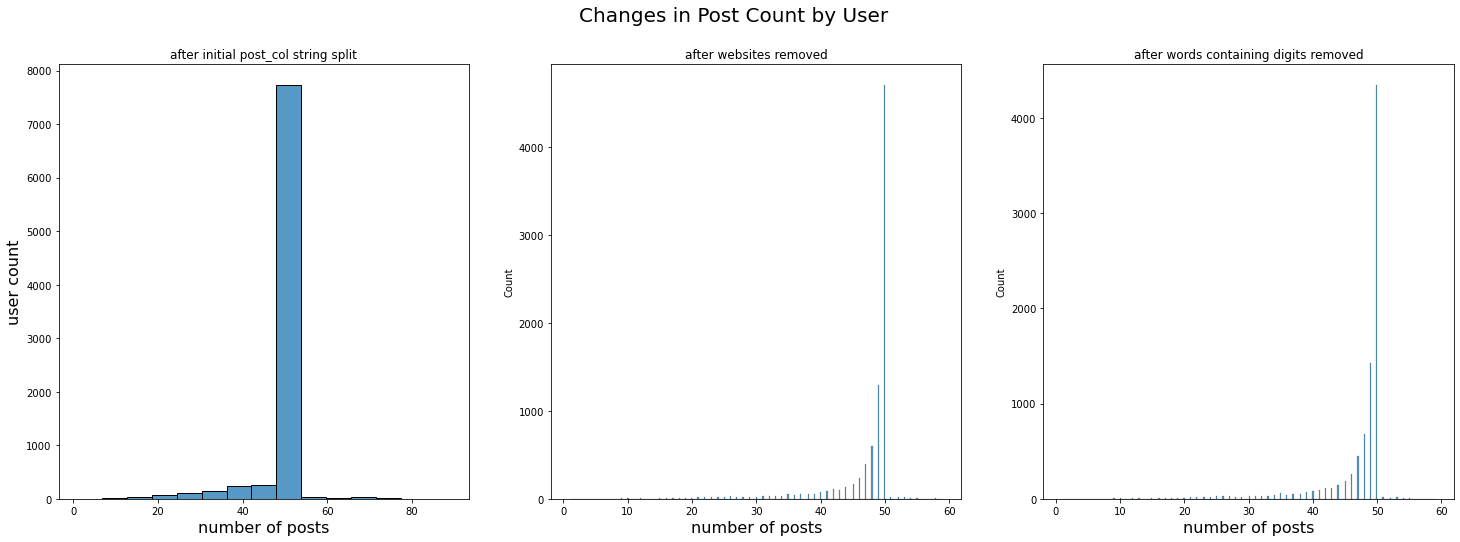

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,8))
sns.histplot(data['post_count'], ax=ax1)
sns.histplot(data['post_count_cleaned'], ax=ax2)
sns.histplot(data['post_count_no_digits'], ax=ax3)
#ax1.axvline(np.mean(data['post_count']), color = 'red')
#ax2.axvline(np.mean(data['post_count_cleaned']), color = 'red')
#ax3.axvline(np.mean(data['post_count_no_digits']), color = 'red')
ax1.set_xlabel('number of posts', fontsize = 16)
ax2.set_xlabel('number of posts', fontsize = 16)
ax3.set_xlabel('number of posts', fontsize = 16)
ax1.set_ylabel('user count', fontsize = 16)
ax1.set_title('after initial post_col string split')
ax2.set_title('after websites removed')
ax3.set_title('after words containing digits removed')
plt.suptitle('Changes in Post Count by User', fontsize = 20);

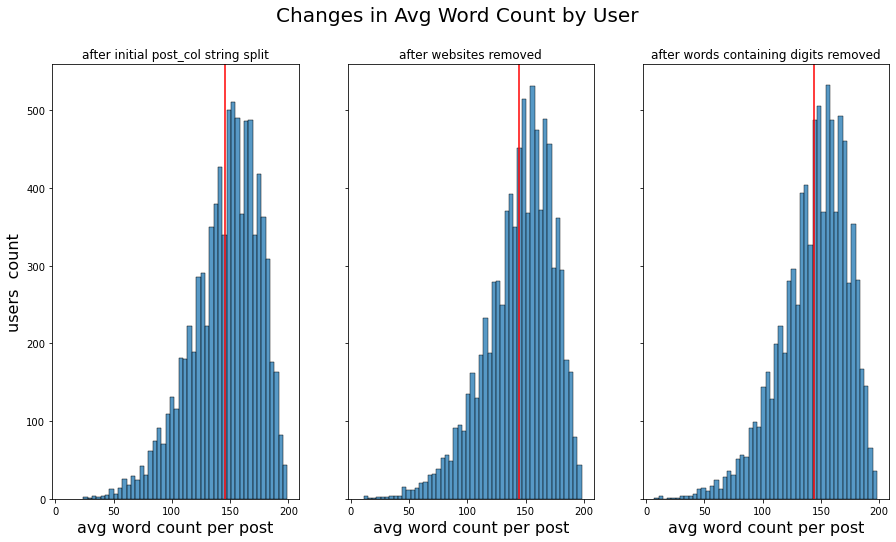

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,8), sharey=True, sharex=True)
sns.histplot(data['avg_word_count'], ax=ax1)
ax1.axvline(np.mean(data['avg_word_count']), color = 'red')
sns.histplot(data['avg_word_count_cleaned'], ax=ax2)
ax2.axvline(np.mean(data['avg_word_count_cleaned']), color = 'red')
sns.histplot(data['avg_word_count_no_digits'], ax=ax3)
ax3.axvline(np.mean(data['avg_word_count_no_digits']), color = 'red')
ax1.set_xlabel('avg word count per post', fontsize = 16)
ax2.set_xlabel('avg word count per post', fontsize = 16)
ax3.set_xlabel('avg word count per post', fontsize = 16)
ax1.set_ylabel('users  count', fontsize = 16)
ax1.set_title('after initial post_col string split')
ax2.set_title('after websites removed')
ax3.set_title('after words containing digits removed')
plt.suptitle('Changes in Avg Word Count by User', fontsize = 20);

/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='comp_score'>

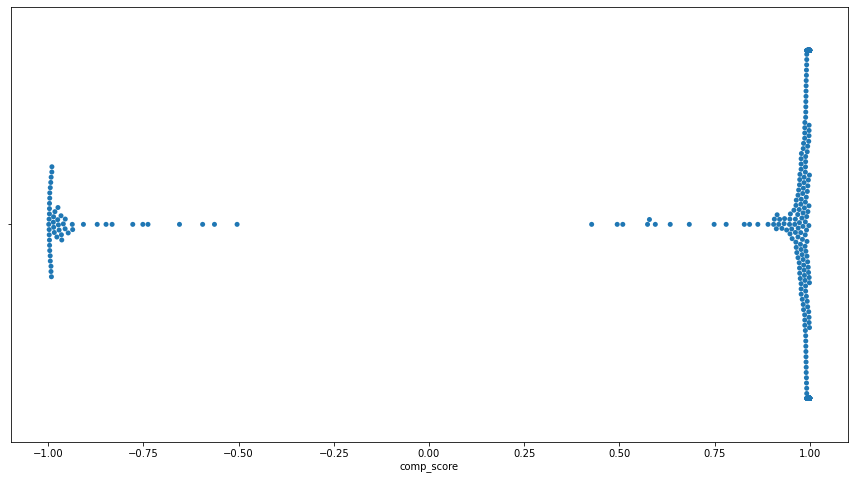

In [58]:
plt.figure(figsize=(15,8))
sns.swarmplot(x = data.loc[:1000]['comp_score'])

/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='cleaned_comp_score'>

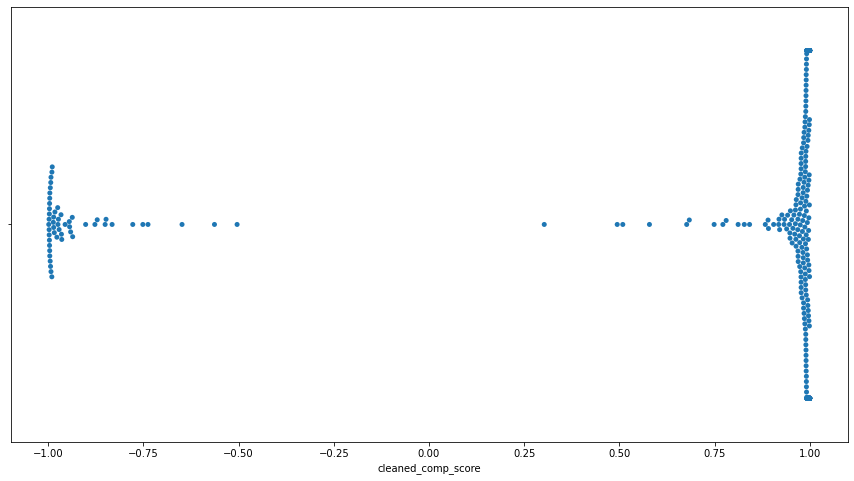

In [59]:
plt.figure(figsize=(15,8))
sns.swarmplot(x = data.loc[:1000]['cleaned_comp_score'])

/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


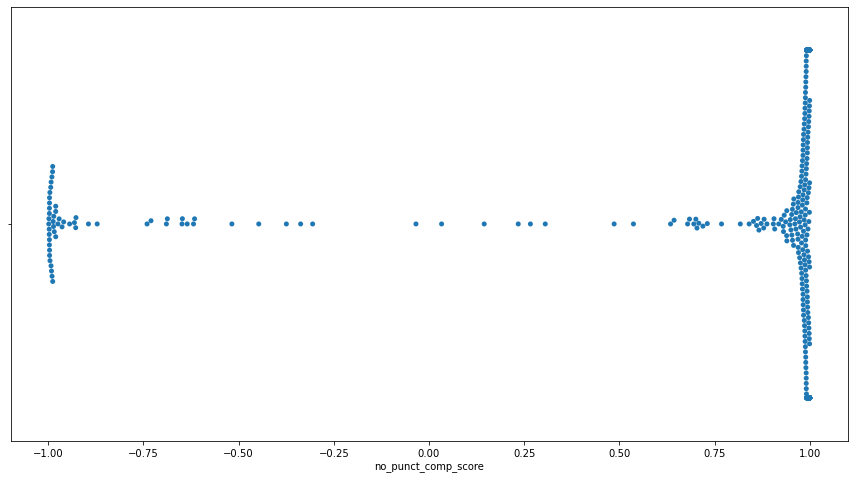

In [60]:
plt.figure(figsize=(15,8))
sns.swarmplot(x = data.loc[:1000]['no_punct_comp_score']);

<br><br><br>

### Expand MBTI type column values

In [27]:
# add empty columns for trait pairs
data = data.reindex(columns = data.columns.tolist() + ['E_I','N_S','F_T','J_P'])

In [28]:
# split MBTI into trait pair column values
for i in range(data.shape[0]):
    data.loc[i,'E_I'] = data.iloc[i,0][0]
    data.loc[i,'N_S'] = data.iloc[i,0][1]
    data.loc[i,'F_T'] = data.iloc[i,0][2]
    data.loc[i,'J_P'] = data.iloc[i,0][3]

In [29]:
# create dictionary of trait pair binary encoding values
mbti_binary_values = {'E': 1, 'I': 0, 'N': 1, 'S': 0, 'F': 1, 'T': 0, 'J': 1, 'P': 0}

In [30]:
# create columns of trait pairs as binary encoded values
for col in data.columns[-4:]:
    data[f'{col}_code'] = data[col].map(mbti_binary_values)

In [31]:
# create column of type as binary code
data['type_code'] = data.iloc[:,-4:].apply(lambda x: ''.join(x.values.astype(str)), axis=1)  

In [32]:
data.head(2)

,type,posts,comp_score,neg_score,neu_score,pos_score,post_count,avg_word_count,posts_cleaned,cleaned_comp_score,...,diff_comp_init-no_punct,E_I,N_S,F_T,J_P,E_I_code,N_S_code,F_T_code,J_P_code,type_code
0,INFJ,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...",0.9877,0.054,0.829,0.116,50,90,[enfp and intj moments sportscenter not top te...,0.9839,...,0.0074,I,N,F,J,0,1,1,1,0111
1,ENTP,['I'm finding the lack of me in these posts ve...,0.9994,0.068,0.752,0.180,50,138,['I'm finding the lack of me in these posts ve...,0.9993,...,0.0009,E,N,T,P,1,1,0,0,1100


<br><br>
### Write To CSV

In [ ]:
data.to_csv('../../data/cleaned/expanded_mbti_df.csv', index=False)

<div class="alert alert-block alert-info">
<b>TO_CSV version tracking: expanded_mbti_df</b><br>
* same mbti_type code encoding column process<br>
* preprocessing steps:<br>
*** perform sentiment analysis (comp / neg / neu / pos) <br>
*** split string to list<br>
*** count strings/posts in list<br>
*** calculate avg words per posts<br>
*** strip websites / continuous spaces / leading and trailing spaces / post strings of less than length of 2 (posts_cleaned)<br>
*** perform sentiment analysis (comp / neg / neu / pos) on reprocessed posts<br>
*** count strings/posts in reprocessed posts list <br>
*** calculate avg words per reprocessed posts<br>
*** strip words containing digits of any kind / continuous spaces / leading and trailing spaces / post strings of less than length of 2 (posts_no_digits)<br>
*** count strings/posts in reprocessed posts list <br>
*** calculate avg words per reprocessed posts<br>
*** strip punctuation not including single quote mark / continuous spaces / leading and trailing spaces / post strings of less than length of 2 (posts_no_punct)<br>
*** perform sentiment analysis (comp / neg / neu / pos) on reprocessed posts<br>
*** count strings/posts in reprocessed posts list <br>
*** calculate avg words per reprocessed posts<br>
*** calculate differences in post_count and word_count from initial->cleaned, cleaned->no_digits, inital->no_digits<br>
*** calculate changes in sentiment compound score from initial->cleaned, cleaned->no_punt, and initial->no_punct<br>
[timestamp: 2/21-5:00p]<br><br>
<b>UPDATED:</b> [timestamp: 2/00-0:00p]
</div>